In [1]:
# !pip install numpy matplotlib pandas tqdm

In [2]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
with open("laptop.json", encoding="utf-8") as f:
    data = json.load(f)

In [4]:
df = pd.DataFrame(data)
df["size"] = df["count"] * df["block_size"]
df.sort_values("duration", ascending=False)

,duration,value,block_size,count,runtime,device,size
3344,0.257484,0.235993,1024,93000,C++,Intel(R) Arc(TM) Graphics,95232000
3452,0.251729,0.242255,1024,96000,C++,Intel(R) Arc(TM) Graphics,98304000
3524,0.244729,0.246427,1024,98000,C++,Intel(R) Arc(TM) Graphics,100352000
3488,0.243251,0.244343,1024,97000,C++,Intel(R) Arc(TM) Graphics,99328000
3416,0.235099,0.240161,1024,95000,C++,Intel(R) Arc(TM) Graphics,97280000
...,...,...,...,...,...,...,...
181,0.000006,0.000080,4,6000,OpenBLAS,Intel(R) Arc(TM) Graphics,24000
145,0.000006,0.000066,4,5000,OpenBLAS,Intel(R) Arc(TM) Graphics,20000
73,0.000006,0.000040,4,3000,OpenBLAS,Intel(R) Arc(TM) Graphics,12000
9,0.000006,0.000053,16,1000,OpenBLAS,Intel(R) Arc(TM) Graphics,16000


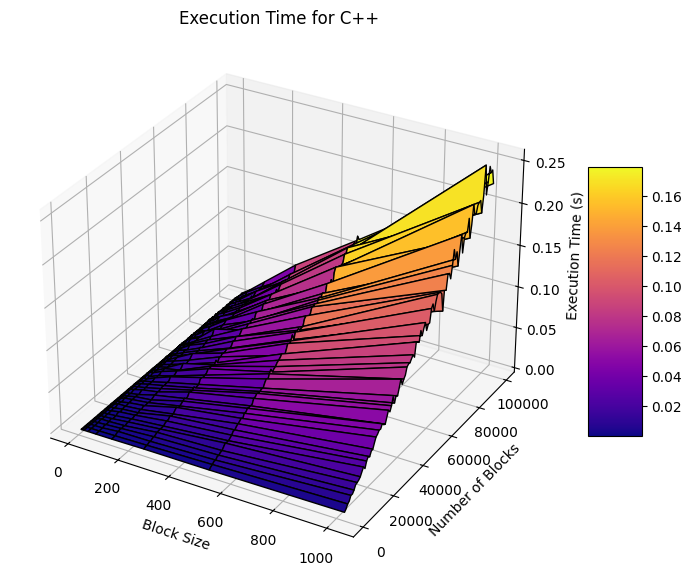

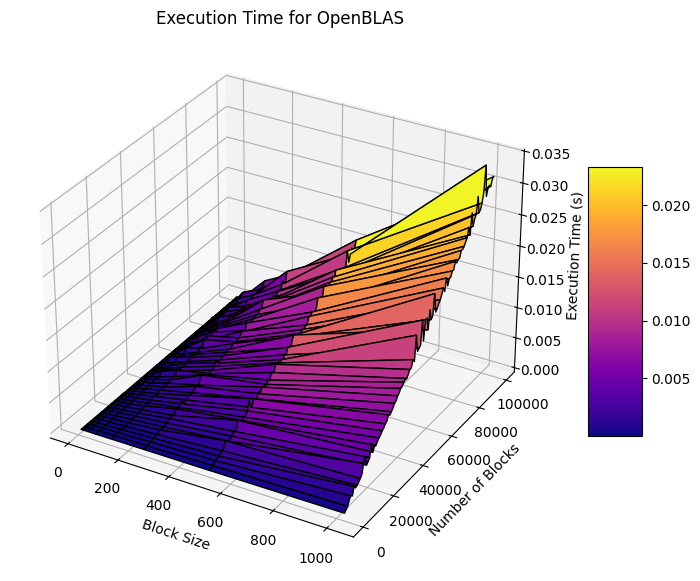

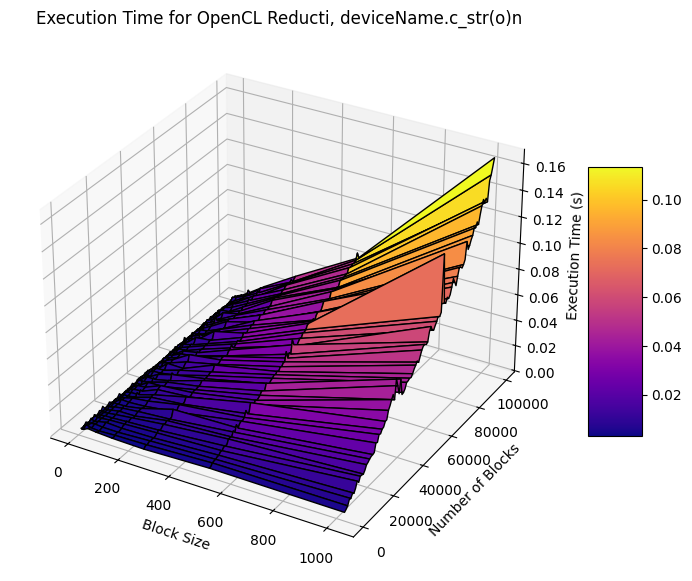

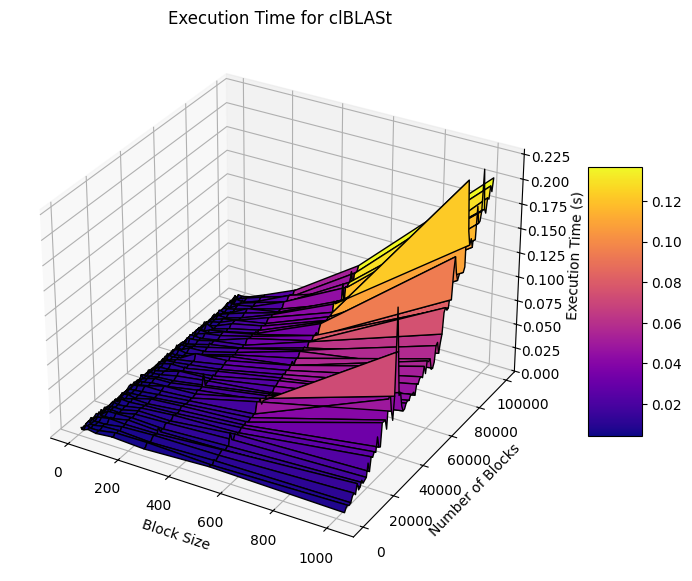

In [5]:
runtimes = df["runtime"].unique()

for target_runtime in runtimes: 
    # target_runtime = 'OpenCL Reduction'
    df_filtered = df[df['runtime'] == target_runtime]

    block_sizes = sorted(df_filtered['block_size'].unique())
    counts = sorted(df_filtered['count'].unique())

    X, Y = np.meshgrid(block_sizes, counts)
    Z = np.zeros_like(X, dtype=float)

    for i, count in enumerate(counts):
        for j, block in enumerate(block_sizes):
            match = df_filtered[
                (df_filtered['block_size'] == block) &
                (df_filtered['count'] == count)
            ]
            if not match.empty:
                Z[i, j] = match['duration'].values[0]
            else:
                Z[i, j] = np.nan

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='k')

    ax.set_xlabel('Block Size')
    ax.set_ylabel('Number of Blocks')
    ax.set_zlabel('Execution Time (s)')
    ax.set_title(f'Execution Time for {target_runtime}')
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
